In [42]:
import numpy as np
import pandas as pd
from pandas_datareader.data import DataReader
import yfinance as yf
from datetime import datetime
import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
import plotly.express as px


In [43]:
techlist=['AAPL','GOOG','MSFT','AMZN']
end=datetime.now()
start=datetime(end.year-1,end.month,end.day)

In [44]:
for stock in techlist:
    globals()[stock]=yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [45]:
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

In [46]:
for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

<AxesSubplot:title={'center':"APPLE's stock price"}, xlabel='Date'>

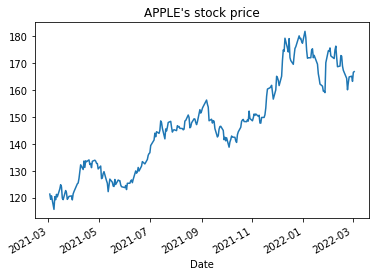

In [47]:
ticker = yf.Ticker('AAPL')
aapl_df = ticker.history(period="1y")
aapl_df['Close'].plot(title="APPLE's stock price")

In [48]:
ma_day = [10,20,30]
for ma in ma_day:
    for company in company_list:
        company['MA_'+str(ma)] = company['Close'].rolling(window=ma).mean()

In [49]:
company

,Open,High,Low,Close,Adj Close,Volume,company_name,MA_10,MA_20,MA_30
Date,,,,,,,,,,
2021-03-02,3143.469971,3163.520020,3087.120117,3094.530029,3094.530029,2595800,AMAZON,NaN,NaN,NaN
2021-03-03,3081.179932,3107.780029,2995.000000,3005.000000,3005.000000,3988700,AMAZON,NaN,NaN,NaN
2021-03-04,3012.000000,3058.129883,2945.429932,2977.570068,2977.570068,5481600,AMAZON,NaN,NaN,NaN
2021-03-05,3005.000000,3009.000000,2881.000000,3000.459961,3000.459961,5388600,AMAZON,NaN,NaN,NaN
2021-03-08,3015.000000,3064.590088,2951.310059,2951.949951,2951.949951,4185000,AMAZON,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-02-25,3011.000000,3079.800049,2984.270020,3075.770020,3075.770020,3119800,AMAZON,3060.993018,3061.881018,3038.533350
2022-02-28,3048.500000,3089.000000,3017.000000,3071.260010,3071.260010,2878500,AMAZON,3061.532007,3071.466016,3033.432682
2022-03-01,3054.649902,3081.979980,2999.540039,3022.840088,3022.840088,2243700,AMAZON,3053.482007,3073.034521,3026.102018


In [50]:
df = DataReader('GOOGL',data_source='yahoo',start='2000-1-1',end='2022-1-1')

In [51]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,52.082081,48.028027,50.050049,50.220219,44659096.0,50.220219
2004-08-20,54.594597,50.300301,50.555557,54.209209,22834343.0,54.209209
2004-08-23,56.796799,54.579578,55.430431,54.754753,18256126.0,54.754753
2004-08-24,55.855858,51.836838,55.675674,52.487488,15247337.0,52.487488
2004-08-25,54.054054,51.991993,52.532532,53.053055,9188602.0,53.053055
...,...,...,...,...,...,...
2021-12-27,2966.879883,2943.389893,2945.120117,2958.129883,798800.0,2958.129883
2021-12-28,2965.979980,2921.090088,2964.719971,2933.739990,910000.0,2933.739990
2021-12-29,2948.340088,2912.949951,2932.889893,2933.100098,889400.0,2933.100098


In [52]:
data = df.filter(['Close'])

In [53]:
data

,Close
Date,
2004-08-19,50.220219
2004-08-20,54.209209
2004-08-23,54.754753
2004-08-24,52.487488
2004-08-25,53.053055
...,...
2021-12-27,2958.129883
2021-12-28,2933.739990
2021-12-29,2933.100098


In [54]:
dataset = data.values

In [55]:
training_data_len = math.ceil(len(dataset) * .9)

In [56]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [57]:
training_data = scaled_data[0:training_data_len, :]

In [70]:
x_train = []
y_train = []
for i in range(60, len(training_data)):
    x_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)

[array([5.60505340e-05, 1.40975825e-03, 1.59489447e-03, 8.25473149e-04,
       1.01740451e-03, 1.34181848e-03, 1.04288144e-03, 3.39701422e-04,
       4.00847342e-04, 4.07643778e-05, 2.54775743e-04, 0.00000000e+00,
       2.66664976e-04, 3.88958109e-04, 3.90656571e-04, 9.03603686e-04,
       1.27217896e-03, 1.94988205e-03, 2.03650619e-03, 2.37111093e-03,
       2.96898373e-03, 3.28660385e-03, 3.02843118e-03, 3.12015071e-03,
       3.53458575e-03, 3.36643414e-03, 3.09976917e-03, 4.56048127e-03,
       5.27725028e-03, 5.02587275e-03, 5.53202473e-03, 5.95325361e-03,
       6.51546000e-03, 6.29635325e-03, 6.59698617e-03, 6.40675586e-03,
       5.98722543e-03, 6.35070403e-03, 6.94518119e-03, 7.13201458e-03,
       7.49040038e-03, 8.34814430e-03, 8.14092678e-03, 6.87554167e-03,
       8.38551046e-03, 1.23005607e-02, 1.48432202e-02, 1.38920583e-02,
       1.46003350e-02, 1.58453385e-02, 1.53935347e-02, 1.63090290e-02,
       1.61120022e-02, 1.55684815e-02, 1.43846251e-02, 1.17774215e-02,
     

In [71]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [72]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [115]:
model = Sequential()
model.add(LSTM(128, return_sequences=True ,input_shape=(x_train.shape[1], 1)))
model.add(LSTM(88, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(56, return_sequences=True))
model.add(LSTM(48, return_sequences=False))
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(16, activation='relu'))

model.add(Dense(1, activation='linear'))


In [116]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 60, 128)           66560     
                                                                 
 lstm_23 (LSTM)              (None, 60, 88)            76384     
                                                                 
 dropout_13 (Dropout)        (None, 60, 88)            0         
                                                                 
 lstm_24 (LSTM)              (None, 60, 56)            32480     
                                                                 
 lstm_25 (LSTM)              (None, 48)                20160     
                                                                 
 dense_24 (Dense)            (None, 128)               6272      
                                                                 
 dense_25 (Dense)            (None, 64)               

In [125]:
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.001,
#     decay_steps=100000,
#     decay_rate=0.96,
#     staircase=True)
    
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer)

In [126]:
model.fit(x_train, y_train, batch_size=16, epochs=50)

Epoch 1/50
243/243 [==============================] - 11s 28ms/step - loss: 1.1793e-04
Epoch 2/50
243/243 [==============================] - 6s 26ms/step - loss: 8.4358e-05
Epoch 3/50
243/243 [==============================] - 6s 25ms/step - loss: 8.2051e-05
Epoch 4/50
243/243 [==============================] - 6s 26ms/step - loss: 8.2866e-05
Epoch 5/50
243/243 [==============================] - 6s 26ms/step - loss: 6.5024e-05
Epoch 6/50
243/243 [==============================] - 6s 26ms/step - loss: 7.4060e-05
Epoch 7/50
243/243 [==============================] - 6s 26ms/step - loss: 6.6005e-05
Epoch 8/50
243/243 [==============================] - 6s 26ms/step - loss: 5.8125e-05
Epoch 9/50
243/243 [==============================] - 6s 23ms/step - loss: 5.5484e-05
Epoch 10/50
243/243 [==============================] - 6s 24ms/step - loss: 6.2047e-05
Epoch 11/50
243/243 [==============================] - 6s 25ms/step - loss: 5.7428e-05
Epoch 12/50
243/243 [==============================

In [137]:
test_data = scaled_data[training_data_len:, :]
X_test = []
Y_test = []

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    Y_test.append(test_data[i, 0])

X_test, Y_test = np.array(X_test), np.array(Y_test)

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [138]:
preds = model.predict(X_test)

In [139]:
preds = scaler.inverse_transform(preds)

In [140]:
rmse = np.sqrt(mean_squared_error(Y_test, preds))

In [141]:
rmse

2110.5811317330317

In [142]:
x_train[0][0]

array([5.6050534e-05])

In [143]:
train = data[:training_data_len]
valid = data[training_data_len+60:]
valid['Predictions'] = preds

C:\Users\Karan\AppData\Local\Temp\ipykernel_7208\1025735923.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



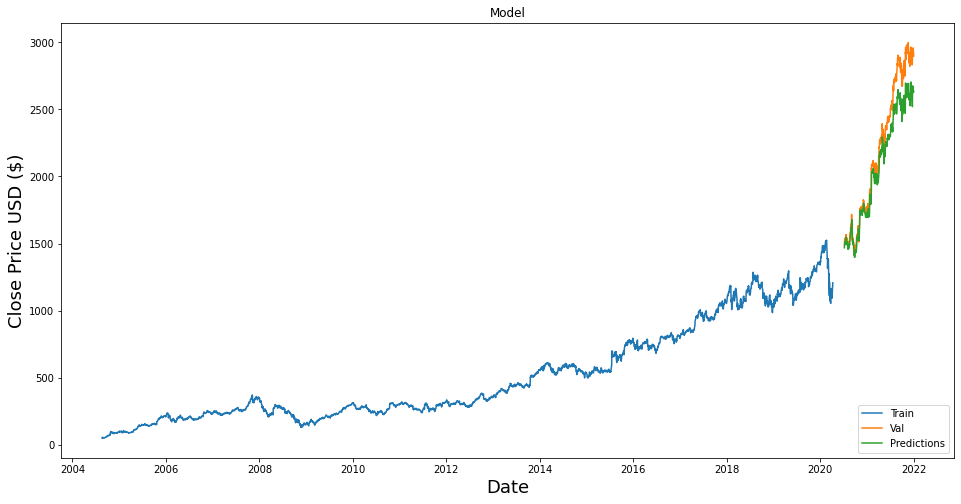

In [144]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In [145]:
x = train.join(valid,how='outer', lsuffix='_train', rsuffix='_valid')

In [147]:
fig = px.line(x)

fig.show()